# Shors algorithm analysis

## Shors algorithm for N = 15: 

### The algorithm 1:

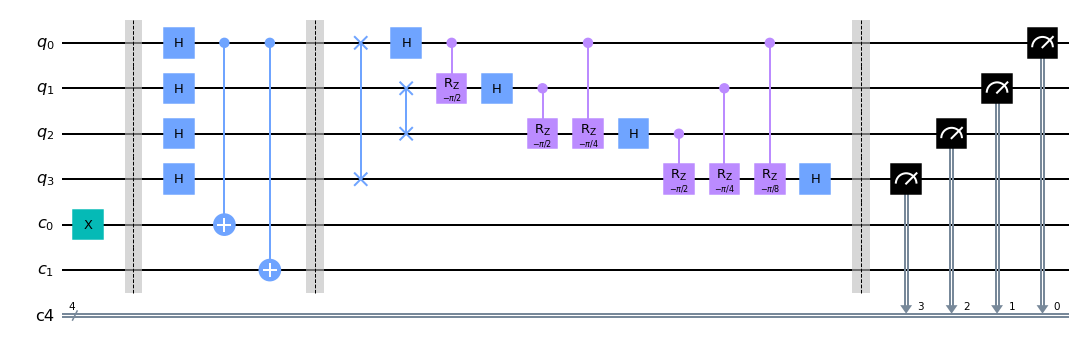

In [62]:
from qiskit.compiler import transpile, assemble
from qiskit import IBMQ	

import numpy as np
import math
import qiskit as q
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_hinton

pi = np.pi

c #Initialize the Working Register
qc_c = QuantumRegister(2, 'c') #Initialize the Control Register
c = ClassicalRegister(4) #Register which will eventually hold measurements
Shor = QuantumCircuit(qc_q, qc_c,c)

Shor.x(4) # It is common convention to add a not gate before Modular Exponentiation
Shor.barrier()

Shor.h(qc_q[0:4]) #Initialize 4 Hadamard Gates to allow for all possibilities

#This is a compiled version of modular exponentiation that will not generalize outside of fermat primes.
Shor.cx(qc_q[0],qc_c[0]) 
Shor.cx(qc_q[0],qc_c[1])
Shor.barrier()

#This can be ommited by classically swapping the order of measurments if noise is an issue.
Shor.swap(qc_q[0],qc_q[3])
Shor.swap(qc_q[1],qc_q[2])

#The Inverse Quantum Fourier Transform
Shor.h(0)
Shor.crz(-pi/2,qc_q[0],qc_q[1])
Shor.h(1)

Shor.crz(-pi/2,qc_q[1],qc_q[2])
Shor.crz(-pi/4,qc_q[0],qc_q[2])
Shor.h(2)

Shor.crz(-pi/2,qc_q[2],qc_q[3])
Shor.crz(-pi/4,qc_q[1],qc_q[3])
Shor.crz(-pi/8,qc_q[0],qc_q[3])
Shor.h(3)

Shor.barrier()

#Measure Working Register
Shor.measure(qc_q[3],3)
Shor.measure(qc_q[2],2)
Shor.measure(qc_q[1],1)
Shor.measure(qc_q[0],0)

Shor.draw(output='mpl')


## Simulated run 

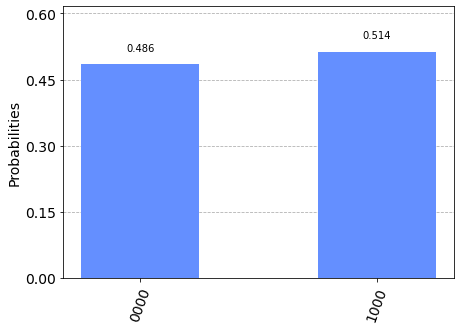

In [66]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(Shor, backend=simulator)
result = job.result()
counts = result.get_counts(Shor)

plot_histogram(counts)

In [67]:
execution_time = result.time_taken
print(execution_time)

0.006784915924072266


## Quantum Run 

In [41]:
# Connecting to IBM 
from qiskit import IBMQ	
IBMQ.save_account('1840e4f2f0bdfcc03c06a6211f6bf750c32729f6e4d1bfeed1c90da39b325064c94779d6e73635106e47ef2eeebd0101682115fbb3ee009b0827e81b8b087b61')
IBMQ.load_account()

configrc.store_credentials:WARNING:2021-05-27 12:14:00,646: Credentials already present. Set overwrite=True to overwrite.
/Users/JOAW-BOOK/Library/Python/3.8/lib/python/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-05-27 12:14:01,141: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [43]:
provider = IBMQ.get_provider(hub = 'ibm-q',group='open', project='main')
qcomp = provider.get_backend('ibmq_16_melbourne')

In [56]:
job = execute(Shor, backend=qcomp)

In [57]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


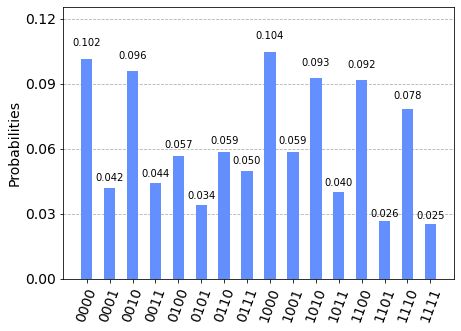

In [58]:
# get results 
result = job.result()
plot_histogram(result.get_counts(Shor))

In [63]:
result = job.result() 
execution_time = result.time_taken
print(execution_time)

9.904187679290771


# Alg 2 

In [64]:
pi = np.pi


qr = QuantumRegister(5)
cr = ClassicalRegister(1)

circuit = QuantumCircuit(qr, cr)
circuit.h([0,1,2])
circuit.barrier()
circuit.cx(2,3)
circuit.cx(2,4)
circuit.barrier()
circuit.h([1])
circuit.barrier()
circuit.crz(pi/2, 1, 0)
# add P(pi/2) here 
circuit.barrier()
circuit.h([0])
circuit.barrier()
circuit.crz(pi/4, 1, 2)
circuit.barrier()
circuit.crz(pi/2, 0, 2)
circuit.barrier()
circuit.measure(0, cr[0])
circuit.measure(1, cr[0])
circuit.measure(2, cr[0])

circuit.draw()


┌───┐ ░            ░       ░ ┌─────────┐ ░ ┌───┐ ░             ░ »
q344_0: ┤ H ├─░────────────░───────░─┤ RZ(π/2) ├─░─┤ H ├─░─────────────░─»
        ├───┤ ░            ░ ┌───┐ ░ └────┬────┘ ░ └───┘ ░             ░ »
q344_1: ┤ H ├─░────────────░─┤ H ├─░──────■──────░───────░──────■──────░─»
        ├───┤ ░            ░ └───┘ ░             ░       ░ ┌────┴────┐ ░ »
q344_2: ┤ H ├─░───■────■───░───────░─────────────░───────░─┤ RZ(π/4) ├─░─»
        └───┘ ░ ┌─┴─┐  │   ░       ░             ░       ░ └─────────┘ ░ »
q344_3: ──────░─┤ X ├──┼───░───────░─────────────░───────░─────────────░─»
              ░ └───┘┌─┴─┐ ░       ░             ░       ░             ░ »
q344_4: ──────░──────┤ X ├─░───────░─────────────░───────░─────────────░─»
              ░      └───┘ ░       ░             ░       ░             ░ »
  c5: 1/═════════════════════════════════════════════════════════════════»
                                                                         »
«                    ░ ┌─┐      
«q344_0: ─────■──────░─┤M├──────
«             │      ░ └╥┘┌─┐   
«q344_1: ─────┼──────░──╫─┤M├───
«        ┌────┴────┐ ░  ║ └╥┘┌─┐
«q344_2: ┤ RZ(π/2) ├─░──╫──╫─┤M├
«        └─────────┘ ░  ║  ║ └╥┘
«q344_3: ────────────░──╫──╫──╫─
«                    ░  ║  ║  ║ 
«q344_4: ────────────░──╫──╫──╫─
«                    ░  ║  ║  ║ 
«  c5: 1/═══════════════╩══╩══╩═
«                       0  0  0

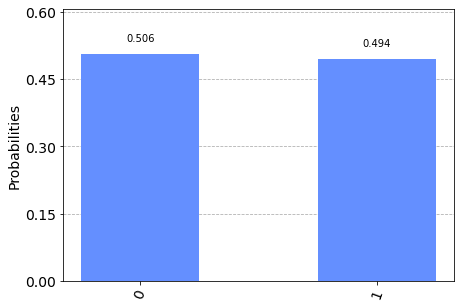

In [68]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts)

In [69]:
execution_time = result.time_taken
print(execution_time)

0.010991811752319336


# Quantum run Alg 2 

In [ ]:
# run on quantum computer 
from qiskit import IBMQ	
IBMQ.save_account('1840e4f2f0bdfcc03c06a6211f6bf750c32729f6e4d1bfeed1c90da39b325064c94779d6e73635106e47ef2eeebd0101682115fbb3ee009b0827e81b8b087b61')
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q',group='open', project='main')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(Shor, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
# get results 
result = job.result()
plot_histogram(result.get_counts(circuit))

In [ ]:
from qiskit import IBMQ	
IBMQ.save_account('1840e4f2f0bdfcc03c06a6211f6bf750c32729f6e4d1bfeed1c90da39b325064c94779d6e73635106e47ef2eeebd0101682115fbb3ee009b0827e81b8b087b61')
IBMQ.load_account()

In [ ]:
provider = IBMQ.get_provider(hub = 'ibm-q',group='open', project='main')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(Shor, backend=qcomp)

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
# get results 
result = job.result()
plot_histogram(result.get_counts(circuit))

In [ ]:
execution_time = result.time_taken
print(execution_time)